# **Digital Signal and Image Management - E02**<br/>
**Master's Degree in Data Science (A.Y. 2024/2025)**<br/>
**University of Milano - Bicocca**<br/>


In [1]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav

import matplotlib.pyplot as plt
import IPython.display as ipd # Notebook only

# Classification tools
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# File management
from google.colab import drive
import tarfile
from shutil import copyfile

# Frequency analysis
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.signal import spectrogram
from librosa.feature import melspectrogram, mfcc
from librosa.display import specshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Link Google Drive account, transfer dataset, and extract files
copyfile('/content/drive/MyDrive/Digital Signal and Image Management/recordings.tar', 'recordings.tar')
tar = tarfile.open('recordings.tar')
tar.extractall()
tar.close()

In [4]:
# Import file
sound_rate, sound_data = wav.read('recordings/0_jackson_0.wav')
# Play the signal
ipd.Audio(sound_data, rate=sound_rate)

In [5]:
# Shape of the audio array: 5148 values, one dimension
sound_data.shape

(5148,)

In [6]:
# Sampling rate: 8000 samples per second
sound_rate

8000

## Data representation

### Temporal representation

In [7]:
# Convert sample index into the corresponding timestamp, for the plot x-axis
sound_time = np.arange(sound_data.shape[0])*1.0/sound_rate

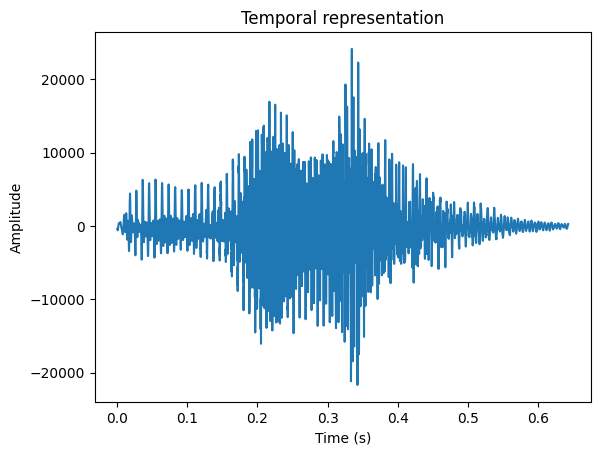

In [8]:
# Visualizing a signal (temporal representation)
plt.plot(sound_time, sound_data);
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Temporal representation')
plt.show()

### Frequency representation (Fast Fourier Transform)

In [9]:
# Conversion into the frequency domain
# fft calculates the Fast Fourier Transform (FFT) of the signal,
# converts a signal from the time domain (i.e. a series of samples over time) to the frequency domain
# (a representation showing which frequencies are present in the signal and with what intensity)
sound_fft = fft(sound_data)
sound_freqs = fftfreq(len(sound_data), 1.0/sound_rate)

In [10]:
# Shape of the temporal representation
sound_data.shape

(5148,)

In [11]:
# Shape of the frequency representation
sound_fft.shape

(5148,)

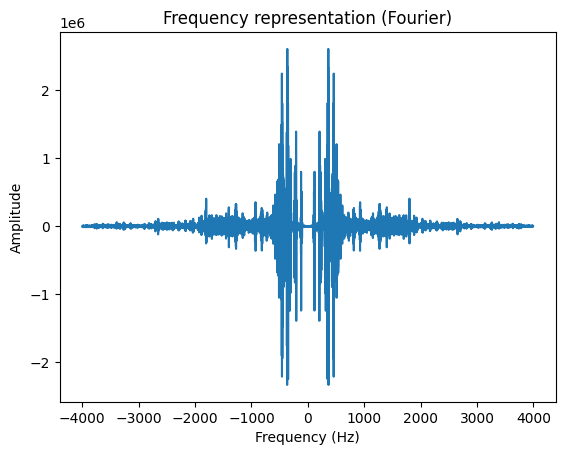

In [12]:
# Visualizing a signal (frequency representation)
plt.plot(sound_freqs, np.real(sound_fft));
plt.xlabel('Frequency (Hz)');
plt.ylabel('Amplitude')
plt.title('Frequency representation (Fourier)')
plt.show()

In [13]:
# Conversion into the frequency domain for real input data
# Calculates the Fast Fourier Transform (FFT) for real signals, which is an optimised variant of the FFT for real signals.
sound_rfft = rfft(sound_data)
sound_rfreqs = rfftfreq(len(sound_data), 1.0/sound_rate)

In [14]:
# Shape of the frequency representation
sound_rfft.shape

(2575,)

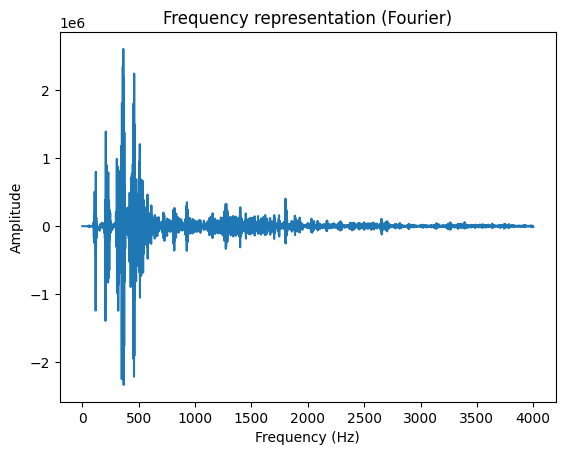

In [15]:
# Visualizing the frequency signal
plt.plot(sound_rfreqs, np.real(sound_rfft));
plt.xlabel('Frequency (Hz)');
plt.ylabel('Amplitude')
plt.title('Frequency representation (Fourier)')
plt.show()
# rttf returns an array containing only the positive part of the frequencies.
# avoids calculating the negative part, which does not add any useful information for real signals.

### Temporal/Frequency representation (Spectrogram)

In [16]:
# Spectrogram computation (with default parameters)
[spec_freqs, spec_times, spec] = spectrogram(sound_data, fs=sound_rate)

In [17]:
# Shape of the output spectrogram
spec.shape

(129, 22)

In [19]:
# Frequency values associated to the 129 rows of `spec`
spec_freqs

array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.75,
        875.  ,  906.25,  937.5 ,  968.75, 1000.  , 1031.25, 1062.5 ,
       1093.75, 1125.  , 1156.25, 1187.5 , 1218.75, 1250.  , 1281.25,
       1312.5 , 1343.75, 1375.  , 1406.25, 1437.5 , 1468.75, 1500.  ,
       1531.25, 1562.5 , 1593.75, 1625.  , 1656.25, 1687.5 , 1718.75,
       1750.  , 1781.25, 1812.5 , 1843.75, 1875.  , 1906.25, 1937.5 ,
       1968.75, 2000.  , 2031.25, 2062.5 , 2093.75, 2125.  , 2156.25,
       2187.5 , 2218.75, 2250.  , 2281.25, 2312.5 , 2343.75, 2375.  ,
       2406.25, 2437.5 , 2468.75, 2500.  , 2531.25, 2562.5 , 2593.75,
       2625.  , 2656.25, 2687.5 , 2718.75, 2750.  , 2781.25, 2812.5 ,
       2843.75, 2875.  , 2906.25, 2937.5 , 2968.75, 3000.  , 3031.25,
       3062.5 , 3093

In [20]:
# Time values associated to the 22 columns of `spec`
spec_times

array([0.016, 0.044, 0.072, 0.1  , 0.128, 0.156, 0.184, 0.212, 0.24 ,
       0.268, 0.296, 0.324, 0.352, 0.38 , 0.408, 0.436, 0.464, 0.492,
       0.52 , 0.548, 0.576, 0.604])

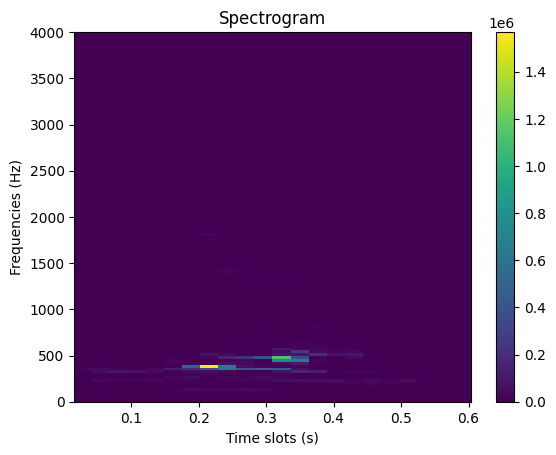

In [21]:
# Spectrogram visualization
plt.imshow(spec, extent=[spec_times[0], spec_times[-1], spec_freqs[0], spec_freqs[-1]], origin='lower', aspect='auto', interpolation='nearest')
plt.xlabel('Time slots (s)')
plt.ylabel('Frequencies (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()
# The rows of the image correspond to frequencies.
# The columns correspond to times.
# The colours indicate the energy or power for that frequency and time.

### Temporal/Frequency representation (Mel Spectrogram)

In [23]:
# Mel spectrogram computation (with default parameters)
# The Mel spectrogram is a transformation of the traditional spectrogram in which frequencies are mapped onto a non-linear scale (Mel scale).
mel = melspectrogram(y=sound_data*1.0, sr=sound_rate)

In [24]:
# Shape of the resulting Mel spectrogram
mel.shape

(128, 11)

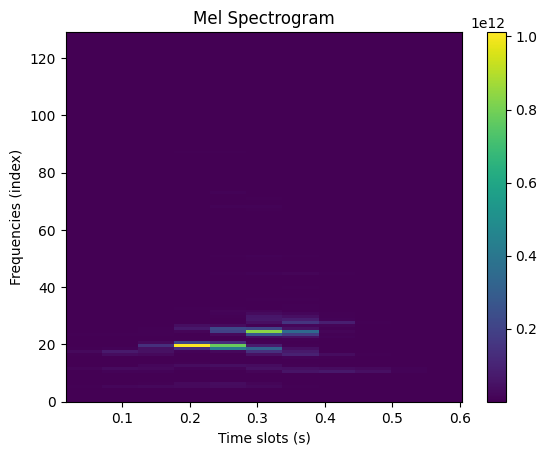

In [25]:
# Mel spectrogram visualization
plt.imshow(mel, extent=[spec_times[0], spec_times[-1], 0, 129], origin='lower', aspect='auto', interpolation='nearest')
plt.xlabel('Time slots (s)')
plt.ylabel('Frequencies (index)')
plt.title('Mel Spectrogram')
plt.colorbar()
plt.show()

**Note:**
* The Mel representation accounts for the fact that we (humans) do not perceive frequencies linearly.
* A Mel spectrogram is computed by redistributing Hertz frequencies into Mel frequencies using an appropriate matrix multiplication.
* The `melspectrogram` function can also be invoked by providing as input a regular spectrogram.
* To display the Mel spectrogram with accurate y-axis values, we resort to a built-in librosa function `specshow`.

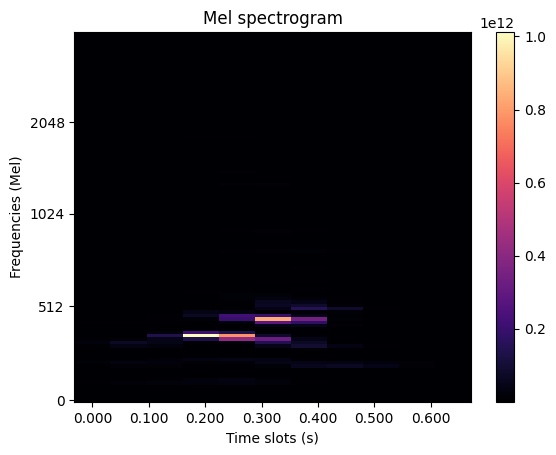

In [27]:
# Mel spectrogram visualization (with librosa)
specshow(mel, x_axis='time', y_axis='mel', sr=sound_rate)
plt.xlabel('Time slots (s)')
plt.ylabel('Frequencies (Mel)')
plt.title('Mel spectrogram')
plt.colorbar()
plt.show()
# The colouring indicates the energy or power of the audio signal at each frequency and time instant.

https://librosa.org/doc/latest/generated/librosa.display.specshow.html

### Cepstral representation (MFCC)
MFCC: Mel-Frequency Cepstral Coefficients

In [30]:
# MFCC computation with default parameters
mfccs = mfcc(y=sound_data*1.0, sr=sound_rate)
# MFCCs (Mel-Frequency Cepstral Coefficients) are coefficients that represent the spectral characteristics of an audio signal
# in a way that is more relevant to human auditory perception.

In [31]:
# Shape of the resulting MFCC matrix
mfccs.shape

(20, 11)

**Note:**
* The MFCC coefficients are based on the Fourier description of a Mel spectrogram (which, in turn, was obtained via Fourier analysis)
  * We are **not** applying the inverse Fourier transform, rather applying Fourier twice
  * Additional transformations are involved, such as logarithmic scaling.
* The result is still a two-dimensional matrix:
  * The first dimension size (20) depends on the choice of the frequencies/coefficients.
  * The second dimension size (11) depends on the duration of the audio track.

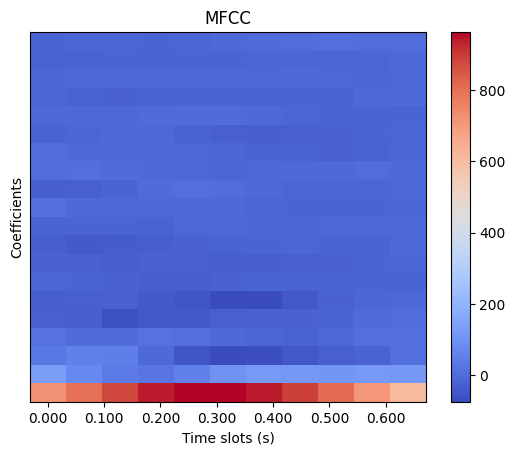

In [32]:
# Visualization via librosa's specshow
specshow(mfccs, sr=sound_rate, x_axis='time')
plt.xlabel('Time slots (s)')
plt.ylabel('Coefficients')
plt.title('MFCC')
plt.colorbar()
plt.show()

**Note:**
* You may observe that lower coefficients have a strong dominance over high coefficients.
* We can, at least for visualization, normalize each "row" (a coefficient) by its own statistics.
  * Note that this is different from the normalization that we use in feature extraction for classification, although the concept is similar.

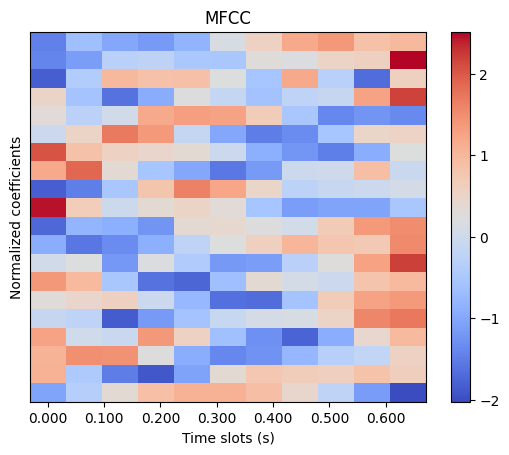

In [39]:
# Scaled visualization
from sklearn.preprocessing import scale
mfccs2 = scale(mfccs, axis=1)
specshow(mfccs2, sr=sound_rate, x_axis='time')
plt.xlabel('Time slots (s)')
plt.ylabel('Normalized coefficients')
plt.title('MFCC')
plt.colorbar()
plt.show()
# Normalisation allows the various MFCC coefficients to be compared without one dominating the others due to differences in scale.

## Classification

### Data loading

In [34]:
# Placecholder for feature extractor
def identity(input):
    return input

# Data loader
def load_data(feature_extractor=identity, normalize=False):

    labels = []
    features = []

    for f in sorted(os.listdir('./recordings')):
        if f.endswith('.wav'):
            # Load file and compute the requested features
            _, signal = wav.read('./recordings/' + f)
            cur_features = feature_extractor(signal)
            features.append(cur_features)

            # Classes
            label = f.split('_')[0]
            labels.append(label)

    # X: features, y: labels
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=1)

    if normalize:
        eps = 0.001
        X_train = np.array(X_train)
        X_train_mean = X_train.mean(axis=0)
        X_train_std = X_train.std(axis=0)
        X_train = (X_train - X_train_mean + eps)/(X_train_std + eps)
        X_train = [row for row in X_train]

        X_test = [row for row in (np.array(X_test) - X_train_mean + eps)/(X_train_std + eps)]

    return X_train, X_test, y_train, y_test

### Temporal features

In [35]:
def feats_temporal(input, size=1000):
    # Remove any values exceeding the given limit
    output = input[0:min(size, input.shape[0])]
    # Add null values (padding) in order to reach the requested size
    output = np.concatenate((output, np.zeros(size-output.shape[0])))
    return output

**Note:**
* Whatever feature we use, we must make sure that all audios have the same feature length.
* This is naturally a problem when it depends on the (variable) duration in seconds.
* Here we are arbitrarily truncating all audio tracks to the first 1000 samples, and adding any shorter track with zeros until it reaches 1000 samples.
  * By looking at the first example (`sound_data`) we know that an average length for this dataset is more likely around 5000.

In [36]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=feats_temporal, normalize=True)

In [37]:
# Verify the shape of extracted features
X_train[0].shape

(1000,)

In [38]:
# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))

Training completed in 41.451s


In [41]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))

Best parameters combination:
 C: 100
 gamma: 0.005


In [42]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.29      0.37        17
           1       0.08      0.20      0.11        10
           2       0.43      0.40      0.41        15
           3       0.11      0.05      0.07        19
           4       0.00      0.00      0.00        11
           5       0.13      0.43      0.20        14
           6       0.35      0.50      0.41        14
           7       0.00      0.00      0.00        19
           8       0.25      0.06      0.10        17
           9       0.33      0.14      0.20        14

    accuracy                           0.20       150
   macro avg       0.22      0.21      0.19       150
weighted avg       0.22      0.20      0.19       150



Confusion matrix:


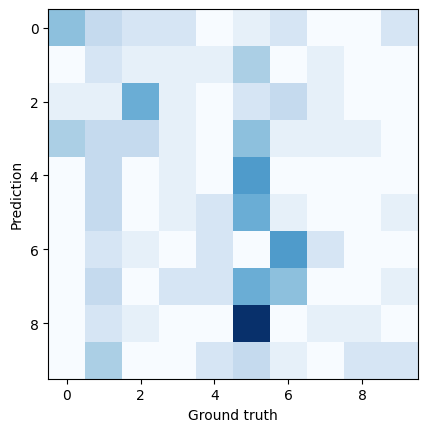

In [43]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Ground truth');
plt.ylabel('Prediction');

**Note:**
* The performance of this "fake" feature is suboptimal, although already better than some of the simplest hand-crafted features that we defined in the previous excercises.

### Frequency features (Fourier)

In [44]:
# The purpose of the feats_fourier function is to apply a Fourier transform to an input signal and then equalise its length,
# just as in the case of feats_temporal.
def feats_fourier(input, size=1000):
    input_ft = np.real(rfft(input))
    # Remove any values exceeding the given limit
    output = input_ft[0:min(size, input_ft.shape[0])]
    # Add null values (padding) in order to reach the requested size
    output = np.concatenate((output, np.zeros(size-output.shape[0])))
    return output

**Note:**
* We are fixing the size of this feature to the same arbitary length of 1000, to have a fair comparison.
* Note that we crop/pad the vector *after* computing FFT.
* Also in this case, it would be more appropriate to study the average length of the data, and select a `size` accordingly.

In [45]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=feats_fourier, normalize=True)

In [46]:
# Verify the shape of extracted features
X_train[0].shape

(1000,)

In [47]:
# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))

Training completed in 31.389s


In [49]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))
# Best parameters combination

Best parameters combination:
 C: 100
 gamma: 0.005


In [50]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# The model will use the spectral information of the signal (obtained via Fourier Transform) to classify the data.

              precision    recall  f1-score   support

           0       0.12      0.06      0.08        17
           1       0.06      0.10      0.07        10
           2       0.20      0.13      0.16        15
           3       0.21      0.21      0.21        19
           4       0.11      0.18      0.13        11
           5       0.00      0.00      0.00        14
           6       0.33      0.07      0.12        14
           7       0.40      0.11      0.17        19
           8       0.00      0.00      0.00        17
           9       0.13      0.57      0.21        14

    accuracy                           0.14       150
   macro avg       0.16      0.14      0.12       150
weighted avg       0.17      0.14      0.12       150



Confusion matrix:


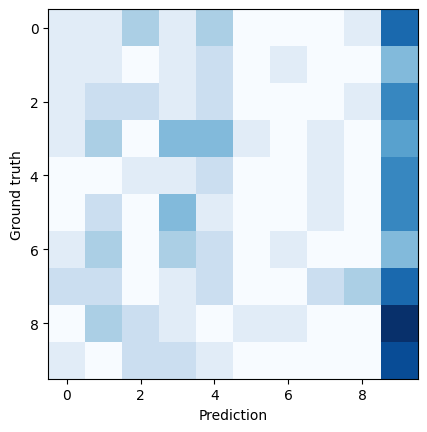

In [51]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

**Note:**
* Truncating the first 1000 elements of a Fourier representation leads to unusable results.
* It is possible that this representation offers greater potential by playing with some hyperparameters.
* However, we will use it as short-time Fourier transform (a.k.a. spectrogram)

### Assignment: classification based on 2D features (Spectrogram, MFCC)

Approach:
1. Extract the 2-dimensional feature
2. Force the feature to have fixed size
3. Unroll the 2-dimensional feature into a 1-dimensional vector

**Hint:**
* For a given feature (e.g. Spectrogram) we still want to fix the feature length, independent of the initial audio track.
* Since now we have two dimensions (rows = frequencies, and cols = time blocks), we have to think about both.
  * The rows will be fixed by default, assuming fixed parameters for the spectrogram extraction.
  * The columns will change, based on the duration of the input track.
* Fixing the feature size *after* unrolling to 1 dimension would be easier, but it is conceptually wrong:
  * Unrolling two matrices with different columns would distribute the same frequencies in different positions in the vector.
  * This would make the classifier unable to reliably "look" for a specific sub-feature in a specific position.

### Temporal/Frequency features (spectrogram)

The function extracts spectrogram features from an audio signal and converts them into a feature vector of fixed size.
Using scipy.signal.spectrogram:

1.   spec_freqs: array of frequencies present in the signal.
2.   spec_times: array of time bins.
3.   spec: array spectrogram (intensity of frequencies over time).

Maintains only the first tsize time columns (if present). If the number of columns is less than tsize, it performs padding with zeros. The function (flatten()) to transform the result into a 1D vector.

In [52]:
def feats_spectrogram(input, rate=8000, tsize=10):
    [spec_freqs, spec_times, spec] = spectrogram(input, fs=rate)
    n_freqs = 128  #  Set the number of frequencies to be maintained
    n_times = tsize  # Set the desired number of time columns

    spec = spec[:, :tsize]  # Keep only the first `n_times` columns

    #Pad the spectrogram with zeros if there are fewer than `n_times` time bins
    if spec.shape[1] < tsize:
        pad_width = tsize - spec.shape[1]
        spec = np.pad(spec, ((0, 0), (0, pad_width)), 'constant')

    # Flatten the spectrogram to a 1D vector
    output = spec.flatten()
    return output

**Note:**
* Let's use `tsize` as a parameter to control the *temporal* size, i.e. the number of columns in our 2D representation
  * This is similar to paramter `size` in the previous 1D features

In [56]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=feats_spectrogram, normalize=True)

In [57]:
# Verify the shape of extracted features
X_train[0].shape

(1290,)

In [58]:
# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))

Training completed in 32.996s


In [59]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))

Best parameters combination:
 C: 1000
 gamma: 0.005


In [60]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.58      0.70      0.64        10
           2       0.77      0.67      0.71        15
           3       0.65      0.58      0.61        19
           4       0.30      0.27      0.29        11
           5       0.75      0.64      0.69        14
           6       0.18      0.64      0.28        14
           7       0.67      0.32      0.43        19
           8       0.80      0.24      0.36        17
           9       0.67      0.43      0.52        14

    accuracy                           0.50       150
   macro avg       0.62      0.51      0.52       150
weighted avg       0.64      0.50      0.53       150



Confusion matrix:


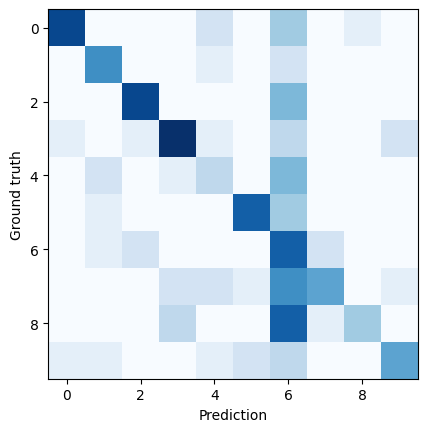

In [61]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

We can see that compared to before, the confusion matrix is better, accuracy of 0.5 confirms this, the classifications made by the model are not most on label 9 as before. The diagonal is marked and the greatest difficulties are on label 6.

### Cepstral features (MFCC)

In [62]:
def feats_mfcc(input, rate=8000, tsize=10):
    num_mfcc = 20  # Set the desired number of MFCC coefficients
    mfccs = mfcc(y=input*1.0, sr=rate, n_mfcc=num_mfcc, n_fft=1024)

    #trim or pad the MFCCs to have tsize time slots
    mfccs = mfccs[:, :tsize]
    if mfccs.shape[1] < tsize:
        pad_width = tsize - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), 'constant')

    # Unroll into 1D vector:
    output = mfccs.flatten()
    return output

In [63]:
# Data loading
# Extract the mfcc feature from the data and categorise the test set.
X_train, X_test, y_train, y_test = load_data(feature_extractor=feats_mfcc, normalize=True)

In [64]:
# Verify the shape of extracted features
X_train[0].shape

(200,)

In [65]:
# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))

Training completed in 17.485s


In [66]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))

Best parameters combination:
 C: 100
 gamma: 0.005


In [67]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        15
           3       0.95      1.00      0.97        19
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        14
           6       1.00      0.93      0.96        14
           7       1.00      0.95      0.97        19
           8       1.00      1.00      1.00        17
           9       0.93      1.00      0.97        14

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



Confusion matrix:


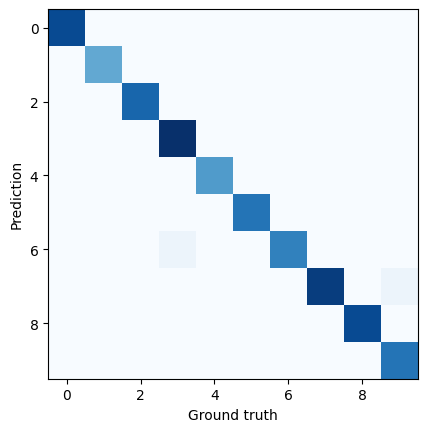

In [68]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Ground truth');
plt.ylabel('Prediction');

**Note:**
* For the specific (default) parameters that we adopted in this excercise, MFCC works better than all other features.
* However, note that better performance could be obtained also for the other features, with fine tuned parameters.
  * The optimization of such parameters is not requested for the assignment.

## Assignment recap

In [69]:
def feats_spectrogram(input, rate=8000, tsize=10):
    [spec_freqs, spec_times, spec] = spectrogram(input, fs=rate)
    n_freqs = 128  #  Set the number of frequencies to be maintained
    n_times = tsize  # Set the desired number of time columns

    spec = spec[:, :tsize]  # Keep only the first `n_times` columns

    #Pad the spectrogram with zeros if there are fewer than `n_times` time bins
    if spec.shape[1] < tsize:
        pad_width = tsize - spec.shape[1]
        spec = np.pad(spec, ((0, 0), (0, pad_width)), 'constant')

    # Flatten the spectrogram to a 1D vector
    output = spec.flatten()
    return output

In [70]:
def feats_mfcc(input, rate=8000, tsize=10):
    num_mfcc = 20  # Set the desired number of MFCC coefficients
    mfccs = mfcc(y=input*1.0, sr=rate, n_mfcc=num_mfcc, n_fft=1024)

    #trim or pad the MFCCs to have tsize time slots
    mfccs = mfccs[:, :tsize]
    if mfccs.shape[1] < tsize:
        pad_width = tsize - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), 'constant')

    # Unroll into 1D vector:
    output = mfccs.flatten()
    return output